In [1]:
import mechanicalsoup
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [1]:
url = 'https://www.hyderabadwater.gov.in/en/wlrreport/'


b = mechanicalsoup.StatefulBrowser()
b.open(url)


b.select_form('form')
b['txtdate'] = '27-Aug-2019'

# b.launch_browser()


r = b.submit_selected()

result_html = r.text

html_mechano_df = pd.read_html(result_html,skiprows=0, header = 1, index_col='Reservoir')[0]

html_mechano_df = html_mechano_df.drop(labels=['Sl. No.', 'Unnamed: 11'], axis='columns')

In [2]:
html_mechano_df.loc['OsmanSagar',:].append(pd.Series({'date':'27-Aug-2019'}))

Full Reservoir Level(FTL) in Feet/m              1790
Storage Capacity at FTL in TMC                    3.9
Level on previous day in Feet                 1763.45
Today's Level in Feet                         1763.45
Today's Capacity in TMC                          0.29
Today's Drawl in MLD                                0
Today's Inflows in TMC                              0
Last year Level in Feet on same date           1777.4
Last year Capacity in TMC on same date          1.599
date                                      27-Aug-2019
dtype: object

In [2]:
dates_needed = pd.date_range(start="01-Jan-2018",
                             end="31-Dec-2018").strftime("%d-%b-%Y")
# Python seems to have a function for every need of yours! I thought of
# converting the date by a method I have not yet hit upon. But there is
# strftime that does it for you. How did I find the particular format?
# %B gives the entire month name - January, February, etc
# Then, on a whim, I tried %b. Worked out.

In [3]:
osmansagar_df = pd.DataFrame()
himayatsagar_df = pd.DataFrame()
manjira_df = pd.DataFrame()
singur_df = pd.DataFrame()
akkampally_df = pd.DataFrame()
nagarjunsagar_df = pd.DataFrame()
srisailam_df = pd.DataFrame()
sripada_df = pd.DataFrame()

In [4]:
for date in dates_needed:
    url = 'https://www.hyderabadwater.gov.in/en/wlrreport/'


    b = mechanicalsoup.StatefulBrowser()
    b.open(url)


    b.select_form('form')
    b['txtdate'] = date

    # b.launch_browser()

    r = b.submit_selected()

    result_html = r.text

    html_mechano_df = pd.read_html(result_html,skiprows=0, 
                                   header = 1, index_col='Reservoir')[0]

    html_mechano_df = html_mechano_df.drop(labels=['Sl. No.', 
                                                   'Unnamed: 11'], 
                                           axis='columns')
    
    osmanappend = html_mechano_df.loc['OsmanSagar',
                                          :].append(pd.Series({'date':
                                                               date}))
    
    himayathappend = html_mechano_df.loc['HimayathSagar',
                                          :].append(pd.Series({'date':
                                                               date}))
    
    singurappend = html_mechano_df.loc['Singur(Ft./M)',
                                          :].append(pd.Series({'date':
                                                               date}))
    
    
    manjiraappend = html_mechano_df.loc['Manjira',
                                          :].append(pd.Series({'date':
                                                               date}))
    
    srisailamappend = html_mechano_df.loc['Srisailam',
                                          :].append(pd.Series({'date':
                                                               date}))
    
    
    
    osmansagar_df = osmansagar_df.append(pd.DataFrame(osmanappend).T)
    
    himayatsagar_df = himayatsagar_df.append(pd.DataFrame(himayathappend).T)
    manjira_df = manjira_df.append(pd.DataFrame(manjiraappend).T)
    
    
    singur_df = singur_df.append(pd.DataFrame(singurappend).T)
    
    srisailam_df = srisailam_df.append(pd.DataFrame(srisailamappend).T)
    

# Plotting results gathered from hyderabadwater.gov.in
From the downloaded data, we have plotted ** capacity ** versus ** level ** of water in the reservoir. The unit of ** capacity ** is **TMC**. What does this even mean? **TMC** stands for *Thousand Million Cubic Feet*, or $10^9$ cubic feet.

Text(0.5, 0, 'Total capacity in TMC')

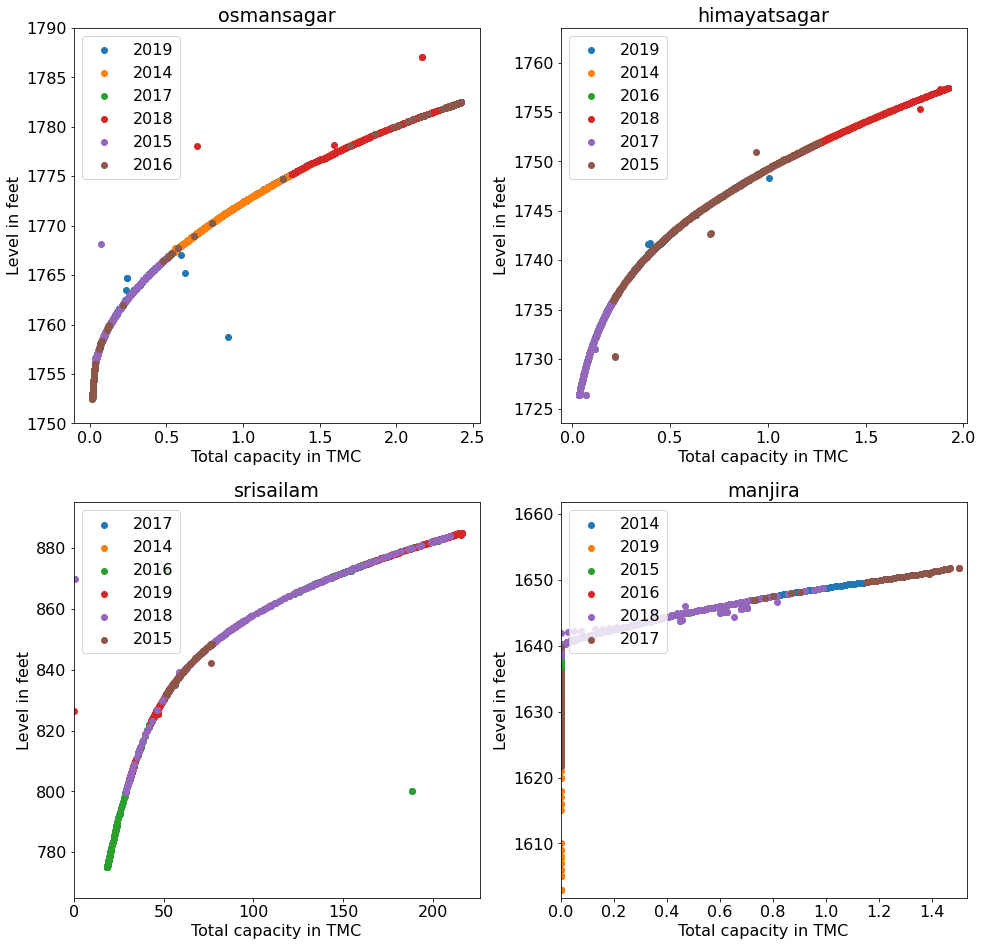

In [98]:
import matplotlib
matplotlib.rcParams['lines.linewidth'] = 2
matplotlib.rcParams['font.size'] = 16

f, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(16,16))

osmanlist = glob.glob('osmansagar*.csv')
himayathlist = glob.glob('himayatsagar*.csv')
srisailamlist = glob.glob('srisailam*.csv')
manjiralist = glob.glob('manjira*.csv')


for filename in osmanlist:
    df = pd.read_csv(filename)
    year = filename.split('_')[-1].split('.')[0]
    ycol = "Today's Level in Feet"
    xcol = "Today's Capacity in TMC"
    '''
    df.plot.scatter(y=ycol, 
                    x=xcol,
                    ax = ax1)
    '''
    ax1.scatter(df[xcol], df[ycol], label=year)

full_res_level = df["Full Reservoir Level(FTL) in Feet/m"][0]
ax1.set_ylim([full_res_level-40, full_res_level+0])
#ax1.set_xlim([1750, 1790])
ax1.legend(loc='upper left')
ax1.set_title(filename.split('_')[0])
ax1.set_ylabel('Level in feet')
ax1.set_xlabel('Total capacity in TMC')

for filename in himayathlist:
    df = pd.read_csv(filename)
    year = filename.split('_')[-1].split('.')[0]
    ycol = "Today's Level in Feet"
    xcol = "Today's Capacity in TMC"
    '''
    df.plot.scatter(y=ycol, 
                    x=xcol,
                    ax = ax1)
    '''
    ax2.scatter(df[xcol], df[ycol], label=year)


ax2.legend(loc='upper left')
full_res_level = df["Full Reservoir Level(FTL) in Feet/m"][0]
ax2.set_ylim([full_res_level-40, full_res_level+0])
ax2.set_title(filename.split('_')[0])
ax2.set_ylabel('Level in feet')
ax2.set_xlabel('Total capacity in TMC')

for filename in srisailamlist:
    df = pd.read_csv(filename)
    year = filename.split('_')[-1].split('.')[0]
    ycol = "Today's Level in Feet"
    xcol = "Today's Capacity in TMC"
    '''
    df.plot.scatter(y=ycol, 
                    x=xcol,
                    ax = ax1)
    '''
    ax3.scatter(df[xcol], df[ycol], label=year)

full_res_level = df["Full Reservoir Level(FTL) in Feet/m"][0]
full_res_cap = df["Storage Capacity at FTL in TMC"][0]

ax3.set_ylim([full_res_level-120, full_res_level+10])
ax3.set_xlim([0, full_res_cap+10])
#ax3.set_ylim([0, 250])
ax3.legend(loc='upper left')
ax3.set_title(filename.split('_')[0])
ax3.set_ylabel('Level in feet')
ax3.set_xlabel('Total capacity in TMC')

for filename in manjiralist:
    df = pd.read_csv(filename)
    year = filename.split('_')[-1].split('.')[0]
    ycol = "Today's Level in Feet"
    xcol = "Today's Capacity in TMC"
    '''
    df.plot.scatter(y=ycol, 
                    x=xcol,
                    ax = ax1)
    '''
    ax4.scatter(df[xcol], df[ycol], label=year)

full_res_level = df["Full Reservoir Level(FTL) in Feet/m"][0]
full_res_cap = df["Storage Capacity at FTL in TMC"][0]

ax4.set_ylim([full_res_level-50, full_res_level+10])
ax4.set_xlim([0, full_res_cap*1.02])
ax4.legend(loc='upper left')
#ax4.set_xlim([1590, 1670])
ax4.set_title(filename.split('_')[0])
ax4.set_ylabel('Level in feet')
ax4.set_xlabel('Total capacity in TMC')

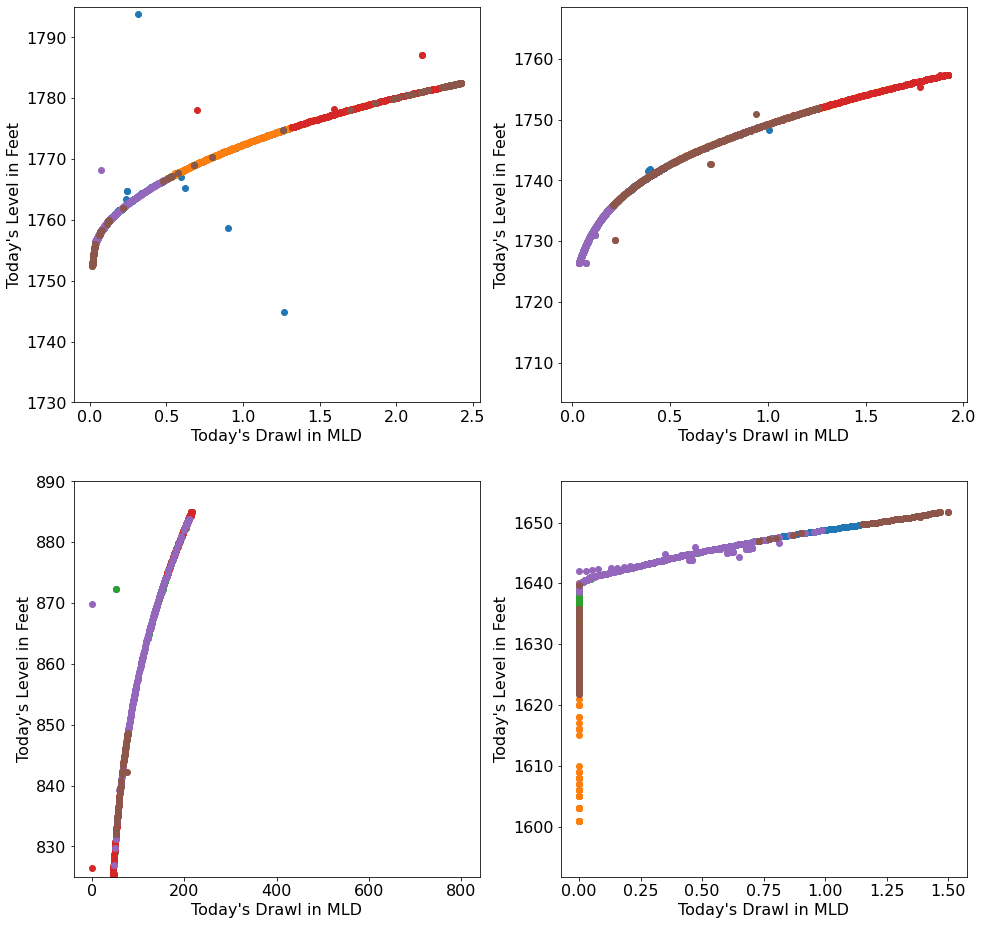

In [107]:
def plottingHydWaterData(filelist, xloc, yloc, axobj):
    
    for filename in filelist:
        year = filename.split('_')[-1].split('.')[0]
        df = pd.read_csv(filename)
        axobj.scatter(df[xcol], df[ycol], label=year)
        axobj.set_xlabel(xloc)
        axobj.set_ylabel(yloc)
        
        full_res_level = df["Full Reservoir Level(FTL) in Feet/m"][0]
        axobj.set_ylim([full_res_level-60, full_res_level+5])
        
g, ((axa, axb), (axc, axd)) = plt.subplots(2,2, figsize=(16,16))

plottingHydWaterData(glob.glob('osmansagar*.csv'),
                     "Today's Drawl in MLD",
                     "Today's Level in Feet",
                     axa)

plottingHydWaterData(glob.glob('himayatsagar*.csv'),
                     "Today's Drawl in MLD",
                     "Today's Level in Feet",
                     axb)

plottingHydWaterData(glob.glob('srisailam*.csv'),
                     "Today's Drawl in MLD",
                     "Today's Level in Feet",
                     axc)

plottingHydWaterData(glob.glob('manjira*.csv'),
                     "Today's Drawl in MLD",
                     "Today's Level in Feet",
                     axd)

In [5]:
def plottingHyderabadReservoirMedianYearlyData(filename, y1loc, y2loc, axobj):
    df_full = pd.read_csv(filename)
    yearlyMedianData = pd.DataFrame()
    #df_full = df_full.fillna('-')
    grpbyyr = df_full.groupby(df_full['date'].str.split('-', expand=True)[2])
    
    for group in grpbyyr.groups:
        year = group
        df = grpbyyr.get_group(group).dropna()
        df['Year'] = int(year)
        yearlyMedianData = yearlyMedianData.append(pd.DataFrame(df.median()).T)
        #print(yearlyMedianData)
        
    axobj.plot(yearlyMedianData['Year'], 
               yearlyMedianData[y1loc], 'o', c = 'b', label='level')
    axobj.set_xlim([yearlyMedianData['Year'].min()-1, 
                    yearlyMedianData['Year'].max()+1 ])
    axobj.set_xlabel('Year', fontsize=16)
    axobj.set_ylabel(y1loc, fontsize=16)
    axobj.legend(loc='upper left')
    
    plt.setp(axobj.get_xticklabels(), fontsize=16)
    plt.setp(axobj.get_yticklabels(), fontsize=16)
    
    axobjtwin = axobj.twinx()
    axobjtwin.plot(yearlyMedianData['Year'], 
                   yearlyMedianData[y2loc], 'd', c='r', label='volume')
    axobjtwin.set_ylabel(y2loc, fontsize=16)
    axobjtwin.legend(loc='upper right')
    
    plt.setp(axobjtwin.get_xticklabels(), fontsize=16)
    plt.setp(axobjtwin.get_yticklabels(), fontsize=16)
    axobj.set_title(filename.split('.')[0], fontsize=18)

In [2]:
'''
# cell not needed anymore but code is useful. hence, do not delete.
filenamelist = ['osmansagar', 'himayatsagar', 'manjira', 'srisailam']

for resname in filenamelist:
    df_full = pd.DataFrame()
    for filename in glob.glob(resname + '_*.csv'):
        df_full = df_full.append(pd.read_csv(filename))
    
    df_full.to_csv(resname + '.csv')
'''


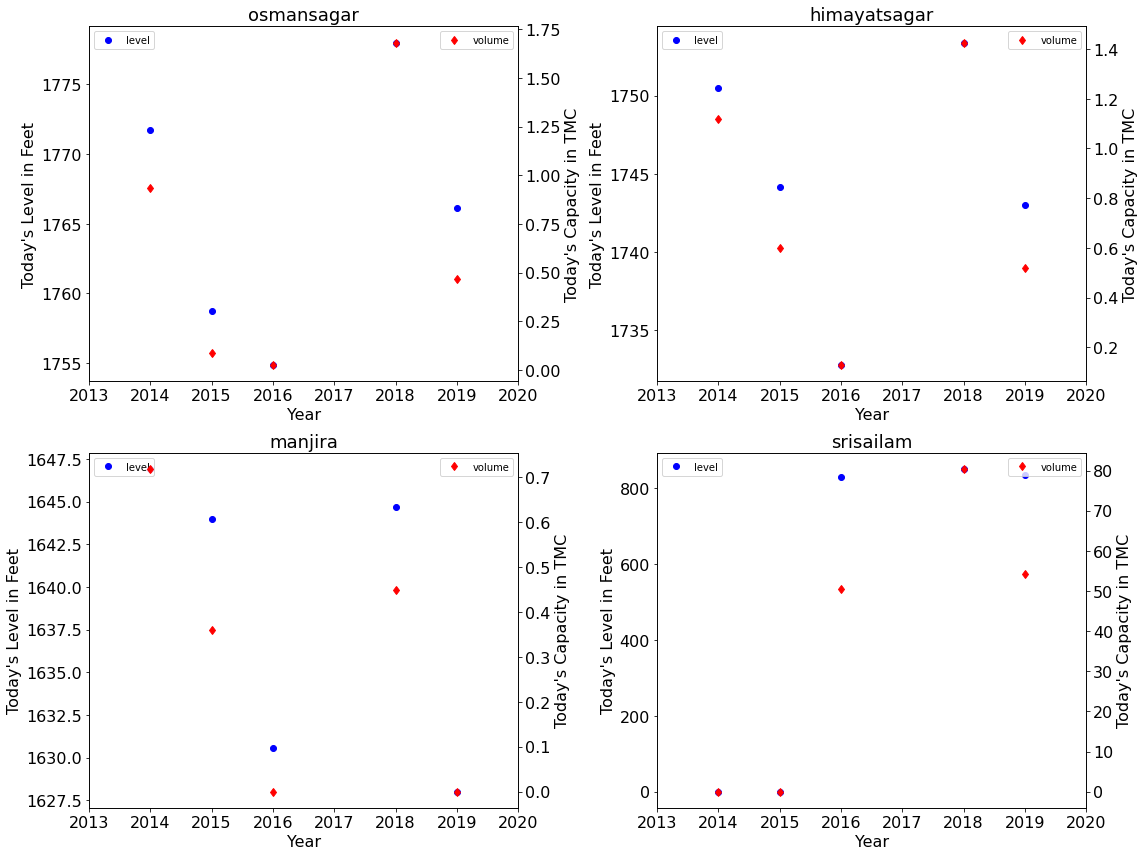

In [10]:
g, ((axa,axb),(axc,axd)) = plt.subplots(2,2, figsize=(16,12))
                     
y1loc = "Today's Level in Feet"
y2loc = "Today's Capacity in TMC"

plottingHyderabadReservoirMedianYearlyData('osmansagar.csv', y1loc, y2loc, axa)
plottingHyderabadReservoirMedianYearlyData('himayatsagar.csv', y1loc, y2loc, axb)
plottingHyderabadReservoirMedianYearlyData('manjira.csv', y1loc, y2loc, axc)
plottingHyderabadReservoirMedianYearlyData('srisailam.csv', y1loc, y2loc, axd)
plt.tight_layout()